In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
course_review = pd.read_csv('Data/Coursera_reviews.csv')
coursera_courses = pd.read_csv('Data/coursera_courses.csv')


In [3]:
coursera_courses.shape, course_review.shape

((623, 4), (1454711, 5))

In [4]:
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [5]:
course_review.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [6]:
combined_data = pd.merge(coursera_courses, course_review, on='course_id', how='inner')

combined_data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1


In [7]:
# Let's get the range of the dates
combined_data['date_reviews'] = pd.to_datetime(combined_data['date_reviews'], errors='coerce')

date_min = combined_data['date_reviews'].min()
date_max = combined_data['date_reviews'].max()

print("Date Range of Reviews:")
print("Earliest Review Date:", date_min)
print("Latest Review Date:", date_max)


Date Range of Reviews:
Earliest Review Date: 2015-08-07 00:00:00
Latest Review Date: 2020-10-10 00:00:00


In [8]:
combined_data['rating'].value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

In [9]:
df = combined_data[['rating','reviews']]

In [10]:
df.isna().sum()

rating       0
reviews    140
dtype: int64

In [11]:
df.duplicated().sum()

993564

In [12]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

/var/folders/mj/rwsfcy551jd8ltwbtw8d_bz00000gn/T/ipykernel_13752/444993789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
/var/folders/mj/rwsfcy551jd8ltwbtw8d_bz00000gn/T/ipykernel_13752/444993789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [13]:
df.duplicated().sum(),df.isna().sum()

(0,
 rating     0
 reviews    0
 dtype: int64)

In [14]:
df['rating'].value_counts()

5    356175
4     75311
3     17212
1      6445
2      5999
Name: rating, dtype: int64

<Axes: >

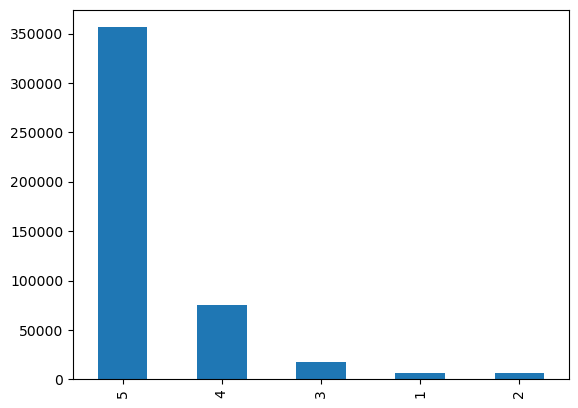

In [15]:
df['rating'].value_counts().plot(kind='bar')

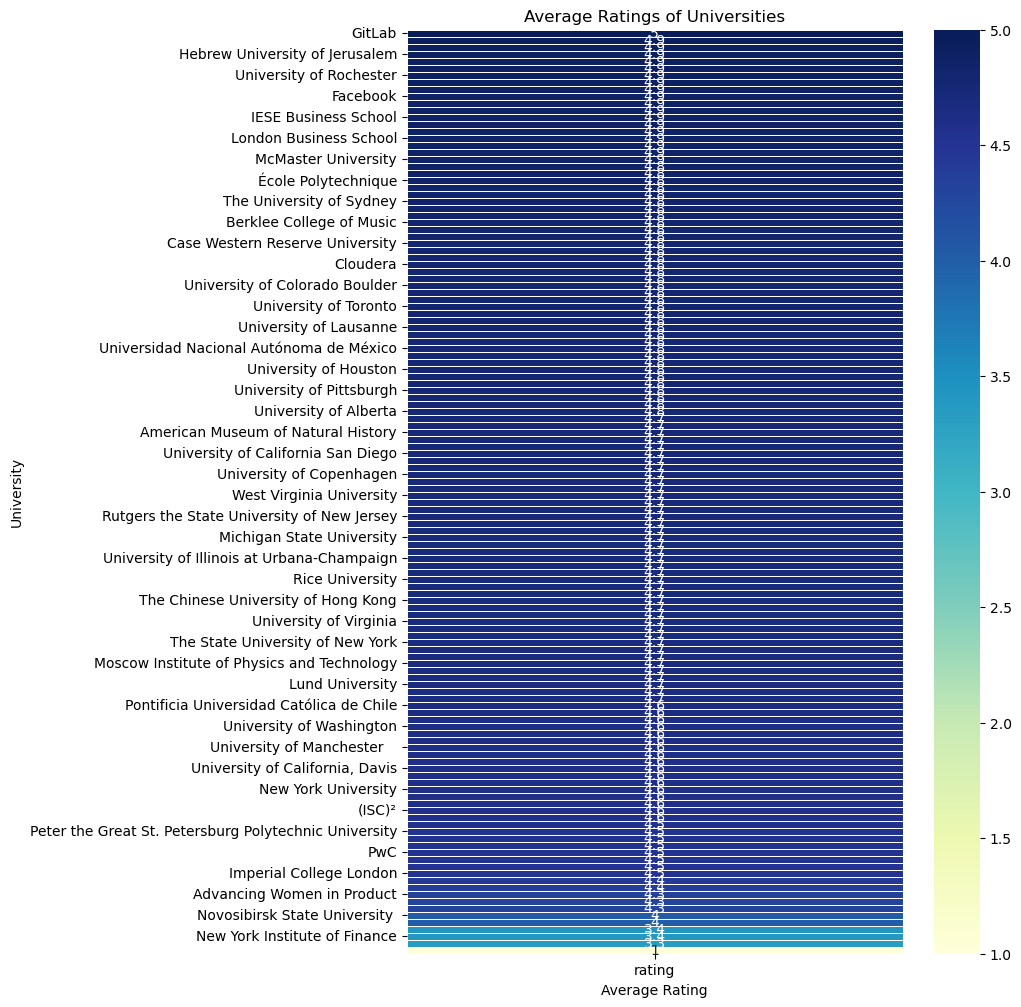

In [16]:
# Let's see what the distribution of universities looks like

university_ratings = combined_data.groupby('institution')['rating'].mean().sort_values(ascending=False)

heatmap_data = pd.DataFrame(university_ratings)

plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)

plt.title("Average Ratings of Universities")
plt.xlabel("Average Rating")
plt.ylabel("University")
plt.show()

In [21]:
combined_data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1


In [23]:
combined_data = combined_data.dropna(subset=['reviews', 'rating'])  # Drop rows where reviews or rating is missing

# Text Cleaning for 'reviews' Column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stop words
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatize each word
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

combined_data['cleaned_reviews'] = combined_data['reviews'].apply(clean_text)

In [24]:
combined_data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,cleaned_reviews
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,extremely basic course machine learning built ...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,course ok certification procedure messno state...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,started week admit good course explaining idea...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,course absolute garbage get feedback quiz assi...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,however good material lecture may use outdated...


In [ ]:
# combined_data.to_csv("Data/combined_data_preprocessed.csv", index=False)

In [26]:
# Feature Engineering: Calculate Average Rating, Review Count per Course
course_stats = combined_data.groupby('course_id').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
).reset_index()

# Merge back into original dataframe
combined_data = combined_data.merge(course_stats, on='course_id', how='left')

# 5. Normalize Rating and Review Count
scaler = StandardScaler()
combined_data[['normalized_rating', 'normalized_review_count']] = scaler.fit_transform(
    combined_data[['avg_rating', 'review_count']]
)

In [27]:
combined_data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,cleaned_reviews,avg_rating,review_count,normalized_rating,normalized_review_count
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,extremely basic course machine learning built ...,4.750522,35895,0.277835,2.014232
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,course ok certification procedure messno state...,4.750522,35895,0.277835,2.014232
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,started week admit good course explaining idea...,4.750522,35895,0.277835,2.014232
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,course absolute garbage get feedback quiz assi...,4.750522,35895,0.277835,2.014232
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,however good material lecture may use outdated...,4.750522,35895,0.277835,2.014232
